In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
ten_min_flow_density_data = pd.read_csv("data/1min_100_m_flow_speed_1hr.csv")
print(ten_min_flow_density_data)

                              Time     Space       Flow     Density
0    2022-11-30 13:00:00.400000095  98170.01  4414.6764   61.219994
1    2022-11-30 13:00:00.400000095  98270.01  4269.2718   62.433325
2    2022-11-30 13:00:00.400000095  98370.01  5213.4114   72.626659
3    2022-11-30 13:00:00.400000095  98470.01  1722.9534   22.573329
4    2022-11-30 13:00:00.400000095  98570.01  4186.1844   59.886661
..                             ...       ...        ...         ...
955  2022-11-30 13:59:00.400000095  99270.01   905.0340   86.433331
956  2022-11-30 13:59:00.400000095  99370.01  1060.4394   64.246664
957  2022-11-30 13:59:00.400000095  99470.01  1641.5316   88.859995
958  2022-11-30 13:59:00.400000095  99570.01  2051.7108  104.599994
959  2022-11-30 13:59:00.400000095  99670.01  2256.9474  116.126662

[960 rows x 4 columns]


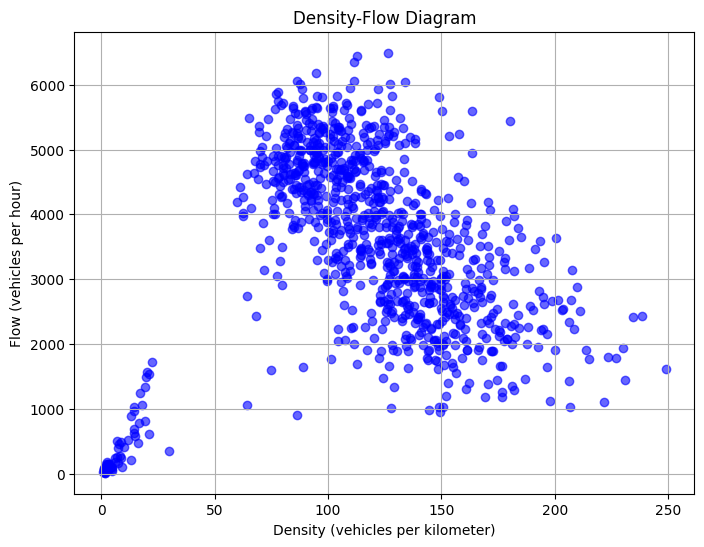

In [27]:
flow = ten_min_flow_density_data["Flow"]
density = ten_min_flow_density_data["Density"]

plt.figure(figsize=(8, 6))
plt.scatter(density, flow, c='blue', alpha=0.6)
# plt.xlim(0, 6000)
plt.title('Density-Flow Diagram')
plt.xlabel('Density (vehicles per kilometer)')
plt.ylabel('Flow (vehicles per hour)')
plt.grid(True)
plt.show()

W -20.98005791354504
b 6277.720124776171
Rho j 299.2232028455546


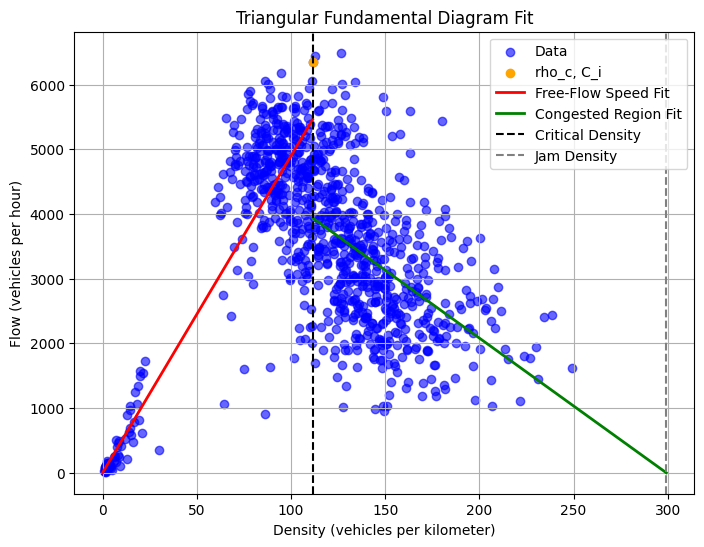

Estimated Free-Flow Speed: 48.96 km/h
Estimated Congestion Wave Speed: -20.98 km/h
Estimated Critical Density: 111.47 vehicles/km
Estimated Jam Density: 299.22 vehicles/km
Capacity drop: 2411.3372294798637
Corrected Jam Density: 299.22 vehicles/km


In [28]:
flow = ten_min_flow_density_data["Flow"].values
density = ten_min_flow_density_data["Density"].values

# Step 1: Identify critical density (density at max flow)
sorted_indices = np.argsort(flow)[-3:]  # Get indices of top 3 flow values
third_largest_index = sorted_indices[0]  # Third largest flow
rho_c = density[third_largest_index]
q_max = flow[third_largest_index]

# rho_c = density[np.argmax(flow)]
# q_max = max(flow)  # Maximum flow at rho_c

mask_free_flow = density < rho_c
vf = np.mean(flow[mask_free_flow] / density[mask_free_flow])  # Average slope
# Step 3: Estimate congestion wave speed using linear regression for congested region
mask_congested = density > rho_c
# Fit a line to the congested region (rho > rho_c)
w, b = np.polyfit(density[mask_congested], flow[mask_congested], 1)  # Get slope & intercept

# Compute jam density correctly
rho_j = -b/w
print("W", w)
print("b", b)
print("Rho j", rho_j)

# Generate points for free-flow and congested lines
rho_free_flow = np.linspace(0, rho_c, 100)
flow_free_flow = vf * rho_free_flow  # Free-flow equation: q = v_f * rho

rho_congested = np.linspace(rho_c, rho_j, 100)
flow_congested = w * rho_congested + b # Corrected equation

# y = mx + b
# 0 = mx_k + b
# x_k = -b/m



# Plot original data
plt.figure(figsize=(8, 6))

plt.scatter(density, flow, c='blue', alpha=0.6, label="Data")
plt.scatter(rho_c, q_max, c = 'orange', alpha = 1.0, label = "rho_c, C_i")

# Plot free-flow speed line
plt.plot(rho_free_flow, flow_free_flow, 'r-', linewidth=2, label="Free-Flow Speed Fit")

# Plot congested region line
plt.plot(rho_congested, flow_congested, 'g-', linewidth=2, label="Congested Region Fit")

plt.axvline(rho_c, color='black', linestyle="--", label="Critical Density")
plt.axvline(rho_j, color='gray', linestyle="--", label="Jam Density")

plt.xlabel("Density (vehicles per kilometer)")
plt.ylabel("Flow (vehicles per hour)")
plt.title("Triangular Fundamental Diagram Fit")
plt.legend()
plt.grid(True)
plt.show()

# Calculate capacity drop
cap_drop = q_max - flow_congested[0]
# Print estimated parameters
print(f"Estimated Free-Flow Speed: {vf:.2f} km/h")
print(f"Estimated Congestion Wave Speed: {w:.2f} km/h")
print(f"Estimated Critical Density: {rho_c:.2f} vehicles/km")
print(f"Estimated Jam Density: {rho_j:.2f} vehicles/km")
print(f"Capacity drop: {cap_drop}")
print(f"Corrected Jam Density: {rho_j:.2f} vehicles/km")